In [1]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

In [2]:
train_settings = ['guns','immigration','lgbtq','leave_out_guns','leave_out_immigration','leave_out_lgbtq']
eval_settings = ['guns','immigration','lgbtq']

In [3]:
eval_dir = '/home/juliame/social-movements/annotated_data/roberta_preds/04-12-2023/movement_splits/eval'

In [4]:
dfs = []
for train_setting in train_settings:
    for eval_setting in eval_settings:
        eval_file = os.path.join(eval_dir,f'{train_setting}_train_{eval_setting}_eval.tsv')
        df = pd.read_csv(eval_file,sep='\t')
        df.columns=['task','precision','recall','f1-score','support']
        df['train_setting'] = train_setting
        df['eval_setting'] = eval_setting
        dfs.append(df)
df = pd.concat(dfs).reset_index()
df = df.drop(columns=['index'])

In [5]:
df_macro = df[(df['task']=='macro avg')][['train_setting','eval_setting','f1-score']]


In [6]:
df_guns = df[(df['train_setting']=='leave_out_guns') & (df['eval_setting']=='guns')]
df_immigration = df[(df['train_setting']=='leave_out_immigration') & (df['eval_setting']=='immigration')]
df_lgbtq = df[(df['train_setting']=='leave_out_lgbtq') & (df['eval_setting']=='lgbtq')]
df_sub = pd.concat([df_guns,df_immigration,df_lgbtq]) 

In [7]:
df_sub

,task,precision,recall,f1-score,support,train_setting,eval_setting
144,Task1:relevance,0.653333,0.954545,0.775726,154.0,leave_out_guns,guns
145,Task2:stance-pro,0.514851,0.776119,0.619048,67.0,leave_out_guns,guns
146,Task2:stance-neutral,0.762295,0.628378,0.688889,148.0,leave_out_guns,guns
147,Task2:stance-anti,0.333333,0.142857,0.200000,35.0,leave_out_guns,guns
148,Task2:stance-explicit,0.775510,0.666667,0.716981,57.0,leave_out_guns,guns
149,Task3:identify,0.546154,0.898734,0.679426,79.0,leave_out_guns,guns
150,Task3:blame,0.512195,0.807692,0.626866,52.0,leave_out_guns,guns
151,Task4:solution,0.611111,0.500000,0.550000,44.0,leave_out_guns,guns
152,Task4:tactics,0.000000,0.000000,0.000000,24.0,leave_out_guns,guns
153,Task4:solidarity,0.500000,0.600000,0.545455,5.0,leave_out_guns,guns


<AxesSubplot:xlabel='eval_setting', ylabel='train_setting'>

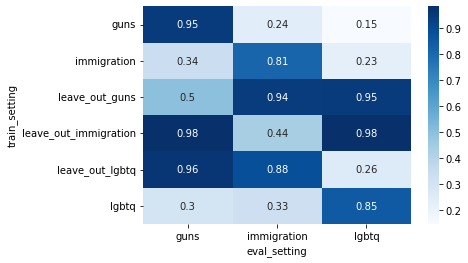

In [10]:
sns.heatmap(df_macro.pivot("train_setting","eval_setting","f1-score"),
           annot=True,cmap='Blues')

In [11]:
def autolabel(rects, fmt='.2f'):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        rect.axes.annotate(f'{{:{fmt}}}'.format(height),
                           xy=(rect.get_x()+rect.get_width()/2., height),
                           xytext=(0, 3), textcoords='offset points',
                           ha='center', va='bottom')

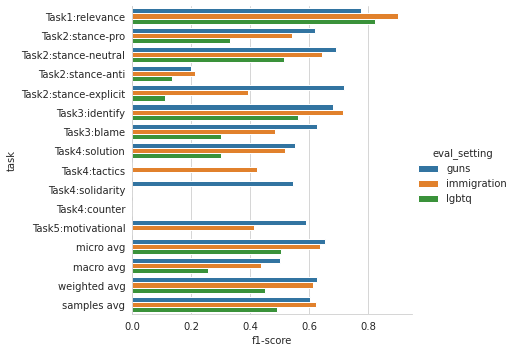

In [23]:
sns.set_style('whitegrid')
g = sns.catplot(y='task',x='f1-score',data=df_sub,hue='eval_setting',kind='bar',aspect=1.25)
plt.show()

In [15]:
df_tasks = 

,task,precision,recall,f1-score,support,train_setting,eval_setting
0,Task1:relevance,1.000000,1.000000,1.000000,154.0,guns,guns
1,Task2:stance-pro,0.985294,1.000000,0.992593,67.0,guns,guns
2,Task2:stance-neutral,1.000000,1.000000,1.000000,148.0,guns,guns
3,Task2:stance-anti,1.000000,1.000000,1.000000,35.0,guns,guns
4,Task2:stance-explicit,0.950000,1.000000,0.974359,57.0,guns,guns
...,...,...,...,...,...,...,...
283,Task5:motivational,0.000000,0.000000,0.000000,27.0,leave_out_lgbtq,lgbtq
284,micro avg,0.679842,0.398148,0.502190,864.0,leave_out_lgbtq,lgbtq
285,macro avg,0.432383,0.226579,0.255944,864.0,leave_out_lgbtq,lgbtq
286,weighted avg,0.678430,0.398148,0.448632,864.0,leave_out_lgbtq,lgbtq


In [16]:
df_macro = df[(df['task']=='macro avg')][['train_setting','eval_setting','f1-score']]


<AxesSubplot:xlabel='eval_setting', ylabel='train_setting'>

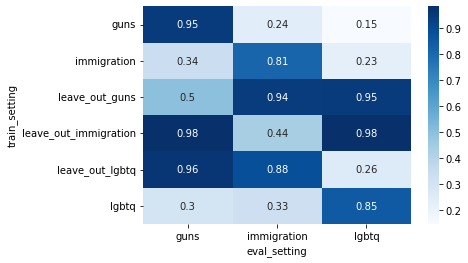

In [19]:
sns.heatmap(df_macro.pivot("train_setting","eval_setting","f1-score"),
           annot=True,cmap='Blues')

In [21]:
df_macro_sub = df[(df['task']=='macro avg')][['train_setting','eval_setting','f1-score']]
df_within = df_macro_sub[(df_macro_sub['train_setting']==df_macro_sub['eval_setting']) | 
                           (df_macro_sub['train_setting']=='guns' &
                           ]

AttributeError: 'Series' object has no attribute 'endswith'

In [26]:
df_sub[df_sub['task']=='macro avg']

,task,precision,recall,f1-score,support,train_setting,eval_setting
157,macro avg,0.517399,0.532638,0.499219,713.0,leave_out_guns,guns
221,macro avg,0.489273,0.417179,0.436600,865.0,leave_out_immigration,immigration
285,macro avg,0.432383,0.226579,0.255944,864.0,leave_out_lgbtq,lgbtq


<AxesSubplot:xlabel='eval_setting', ylabel='task'>

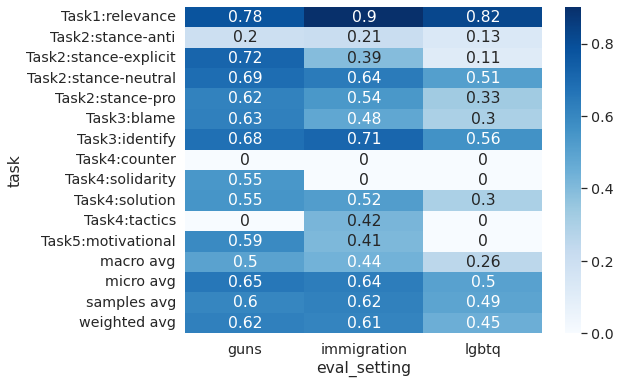

In [35]:
sns.set(font_scale=1.3)
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches
sns.heatmap(df_sub.pivot("task","eval_setting","f1-score"),
           annot=True,cmap='Blues')

<AxesSubplot:xlabel='eval_setting', ylabel='task'>

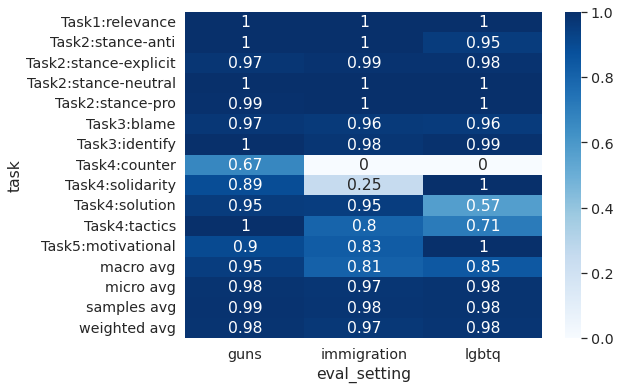

In [38]:
df_within = df[df['train_setting']==df['eval_setting']]
fig, ax = plt.subplots(figsize=(8,6))         # Sample figsize in inches
sns.heatmap(df_within.pivot("task","eval_setting","f1-score"),
           annot=True,cmap='Blues')